Collection - Standard
    <br>Pizza Beacon
    <br>Distance - Line
    <br>Distance - Obstacles
    <br>Distance - Calculation

In [90]:
#Initializing the position of the robot & the position of the pizzas that are appeared at random

robot_position = [(4,3)]
pizza_position = [(0,0), (9,0), (4,0)]

In [2]:
#Finding the Euclidean Distance between the robot and each of the pizzas

def euclideanDistance(coordinate1, coordinate2):
    return pow(pow(coordinate1[0] - coordinate2[0], 2) + pow(coordinate1[1] - coordinate2[1], 2), .5)

In [3]:
#Finding the pizza closest to the robot

def Closest_Pizza_Pos(robot_position, pizza_position):
    distances = []
    
    for j in range(len(pizza_position)):
        distances += [euclideanDistance(robot_position[0],pizza_position[j])]
    
    min_distance = min(distances)
    shortest_pizza_pos = distances.index(min_distance)
    
    #Returns the closest pizza
    return shortest_pizza_pos  

In [91]:
#Calling the function to find the nearest pizza
pizza_pos = Closest_Pizza_Pos(robot_position, pizza_position)
pizza_pos

2

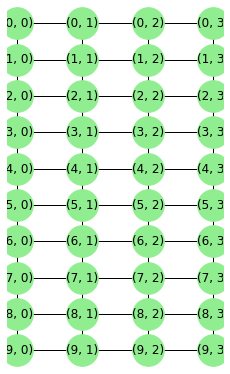

In [92]:
import networkx as nx
from matplotlib import pyplot as plt

#Creating a 2D graph
Graph1 = nx.grid_2d_graph(10,4)

#Plotting the graph
plt.figure(figsize=(3,5))
pos = {(x,y):(y,-x) for x,y in Graph1.nodes()}
nx.draw(Graph1, pos=pos, 
        node_color='lightgreen', 
        with_labels=True,
        node_size=1000)

In [6]:
#Function to find the pizza without considering the obstacles

def Path_Finder(initial, final, Graph1):
    G=Graph1
    path = nx.bidirectional_shortest_path(G, source=initial, target=final)
    return path


In [101]:
#Robot's coordinates
initial = robot_position[0]
print('Position of the robot:', initial)
      
#Target pizza's coordinates
final = pizza_position[pizza_pos]
print('Position of the target pizza:', final)

path = Path_Finder(initial, final, Graph1)
print('Path to reach the pizza:', path)

Position of the robot: (4, 3)
Position of the target pizza: (4, 0)
Path to reach the pizza: [(4, 3), (4, 2), (4, 1), (4, 0)]


In [7]:
#Defining a class to create nodes

class Node():
    #A node class for the A star Pathfinding

    def __init__(self, parent=None, position=None):

        self.parent = parent
        self.position = position

        #is the distance between the node
        self.gCost = 0
        #h cost is also called heuristc value (estimated value)
        self.hCost = 0
        #f cost is gCost + hCost
        self.fCost = 0

    def __eq__(self, other):
        return self.position == other.position
    

#Defining A* algorithm

def algorithm(grid, start, end):
    # Create start and end node

    startNode = Node(None, start)
    startNode.gCost = startNode.hCost = startNode.fCost = 0
    endNode = Node(None, end)
    endNode.gCost = endNode.hCost = endNode.fCost = 0

    # Initialize both open and closed list
    openList = []
    closedList = []
    openList.append(startNode)

    # Loop until you find the end node
    while len(openList) > 0:
        currentNode = openList[0]
        currentIndex = 0

        for index, item in enumerate(openList):
            if item.fCost < currentNode.fCost:
                currentNode = item
                currentIndex = index

        # add to closed list
        openList.pop(currentIndex)
        closedList.append(currentNode)

        # reach the Destination
        if currentNode == endNode:
            path = []
            current = currentNode

            while current is not None:
                path.append(current.position)
                current = current.parent
            # Return reversed path
            return path[::-1] 

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:

            node_position = (currentNode.position[0] + new_position[0], currentNode.position[1] + new_position[1])

            # Make sure is within range
            if node_position[0] > (len(grid) - 1) or node_position[0] < 0 or node_position[1] > (len(grid[len(grid)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable 
            if grid[node_position[0]][node_position[1]] != 0:
                continue

            # Create a new node
            new_node = Node(currentNode, node_position)
            children.append(new_node)
        for child in children:
            for closed_child in closedList:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.gCost = currentNode.gCost + 1
            child.hCost = ((child.position[0] - endNode.position[0]) ** 2) + ((child.position[1] - endNode.position[1]) ** 2)
            child.fCost = child.gCost + child.hCost
            for openNode in openList:
                if child == openNode and child.gCost > openNode.gCost:
                    continue
            openList.append(child)
            
            



In [102]:
#Initializing the map
grid =[[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0]]

StartNode = initial
EndNode = final
layout = algorithm(grid, StartNode, EndNode)
print(layout)


[(4, 3), (4, 2), (3, 1), (4, 0)]
